In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
# Data Loading

LAozone = pd.read_csv('LAozone.csv')
LAozone.head()

print ("Original Size LAozone", LAozone.shape)

#Removing "Unnamed" colum 
LAozone= LAozone[['ozone', 'vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy']]

print ("Clean Size LAozone", LAozone.shape)

Original Size LAozone (330, 11)
Clean Size LAozone (330, 10)


In [3]:
# Cheking null values
LAozone.isnull().sum()*100/LAozone.shape[0]

ozone       0.0
vh          0.0
wind        0.0
humidity    0.0
temp        0.0
ibh         0.0
dpg         0.0
ibt         0.0
vis         0.0
doy         0.0
dtype: float64

In [4]:
LAozone.describe()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,11.775758,5750.484848,4.890909,58.130303,61.754545,2572.875758,17.369697,161.160606,124.533333,181.727273
std,8.011277,105.708241,2.293159,19.865000,14.458737,1803.885870,35.717181,76.679424,79.362393,106.060593
min,1.000000,5320.000000,0.000000,19.000000,25.000000,111.000000,-69.000000,-25.000000,0.000000,3.000000
25%,5.000000,5690.000000,3.000000,47.000000,51.000000,877.500000,-9.000000,107.000000,70.000000,90.250000
50%,10.000000,5760.000000,5.000000,64.000000,62.000000,2112.500000,24.000000,167.500000,120.000000,177.500000
75%,17.000000,5830.000000,6.000000,73.000000,72.000000,5000.000000,44.750000,214.000000,150.000000,275.750000
max,38.000000,5950.000000,21.000000,93.000000,93.000000,5000.000000,107.000000,332.000000,350.000000,365.000000


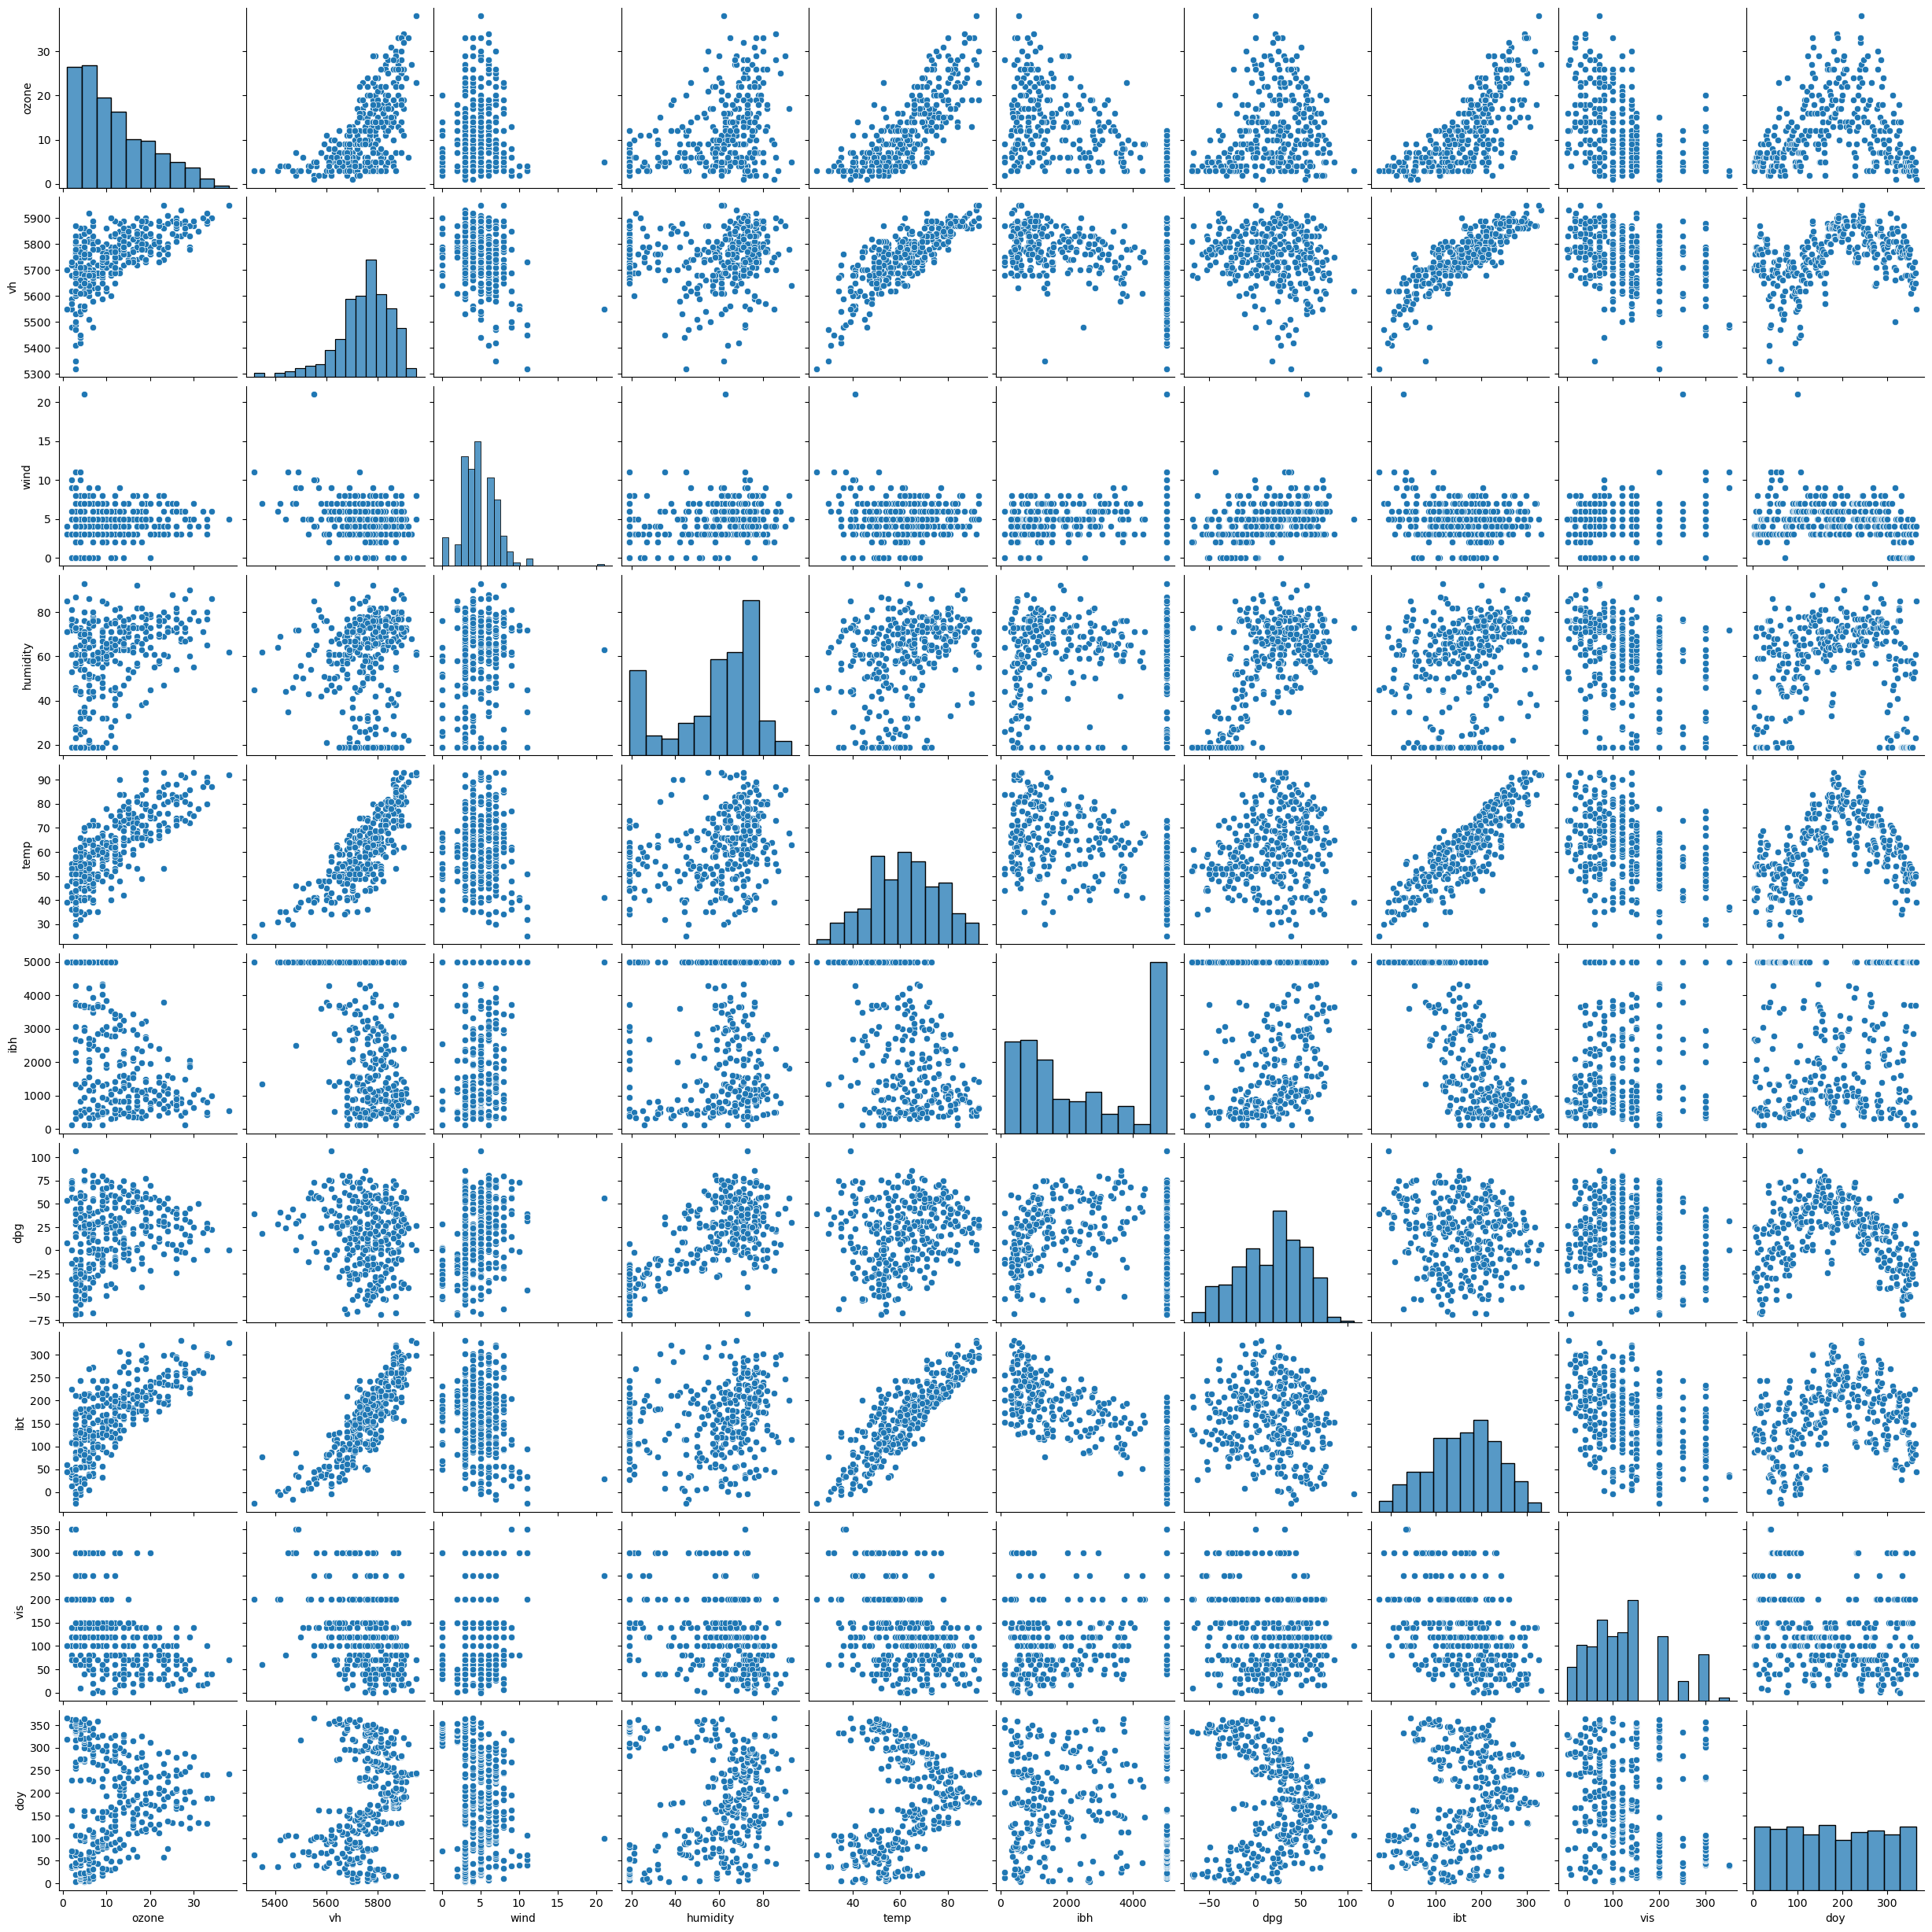

In [5]:
# plot numerical data as pairs
sns.pairplot(LAozone);


<Axes: >

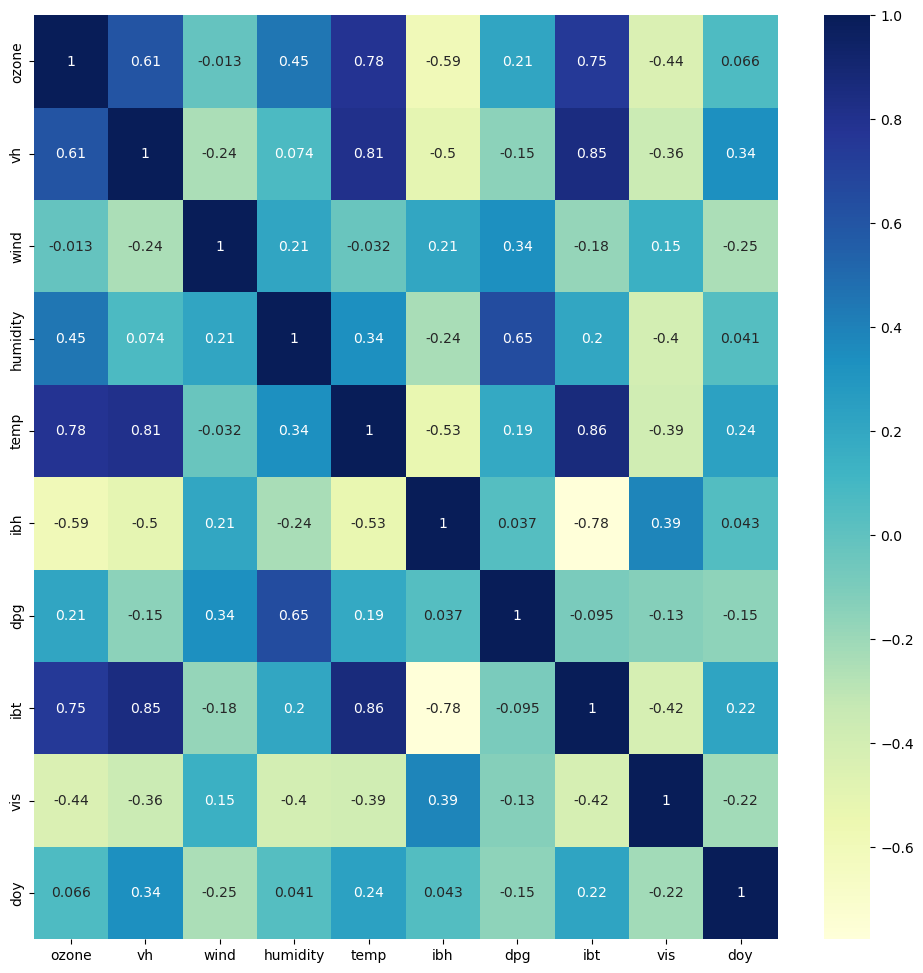

In [8]:
# Correlations
plt.figure(figsize=(12,12))
sns.heatmap(LAozone.corr(), cmap="YlGnBu", annot = True)
# plt.show()

In [5]:
import statsmodels.api as sm
X = LAozone[['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy']]
y = LAozone['ozone']



In [6]:
# Add a constant to get an intercept
X_sm = sm.add_constant(X)


In [7]:
# Fit the resgression line using ‘OLS’
model = sm.OLS(y, X_sm).fit()

# Alternative way

#from statsmodels.formula.api import ols
#model = ols("sales ~ youtube+facebook+newspaper", data=df).fit()

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ozone   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     83.40
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.65e-78
Time:                        08:14:10   Log-Likelihood:                -955.16
No. Observations:                 330   AIC:                             1930.
Df Residuals:                     320   BIC:                             1968.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3793     29.505      0.623      0.5

In [9]:
# VIF estimation

from statsmodels.stats.outliers_influence import variance_inflation_factor


print("Columns for VIF estimation", X.columns)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

print(vif_data)

Columns for VIF estimation Index(['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy'], dtype='object')
    feature         VIF
0        vh   73.698618
1      wind    7.177032
2  humidity   21.834728
3      temp  160.872648
4       ibh   13.251433
5       dpg    3.353920
6       ibt   79.227608
7       vis    5.095506
8       doy    5.421118


In [22]:
# Simplified model removing= vh wind ibh dpg
X_simp = LAozone[['humidity', 'temp', 'ibt', 'vis', 'doy']]
y_simp = LAozone['ozone']



In [23]:
# Add a constant to get an intercept
X_simp_sm = sm.add_constant(X_simp)


In [24]:
# Fit the resgression line using ‘OLS’
model_simp = sm.OLS(y_simp, X_simp_sm).fit()

# Alternative way

#from statsmodels.formula.api import ols
#model = ols("sales ~ youtube+facebook+newspaper", data=df).fit()

In [25]:
print(model_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                  ozone   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     150.4
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           3.24e-82
Time:                        09:00:55   Log-Likelihood:                -956.37
No. Observations:                 330   AIC:                             1925.
Df Residuals:                     324   BIC:                             1948.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3189      1.635     -6.309      0.0

In [28]:
# VIF estimation
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_simp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_simp.values, i)
                        for i in range(len(X_simp.columns))]

print(vif_data)



    feature        VIF
0  humidity  11.501445
1      temp  59.858288
2       ibt  22.257528
3       vis   3.445520
4       doy   4.106155


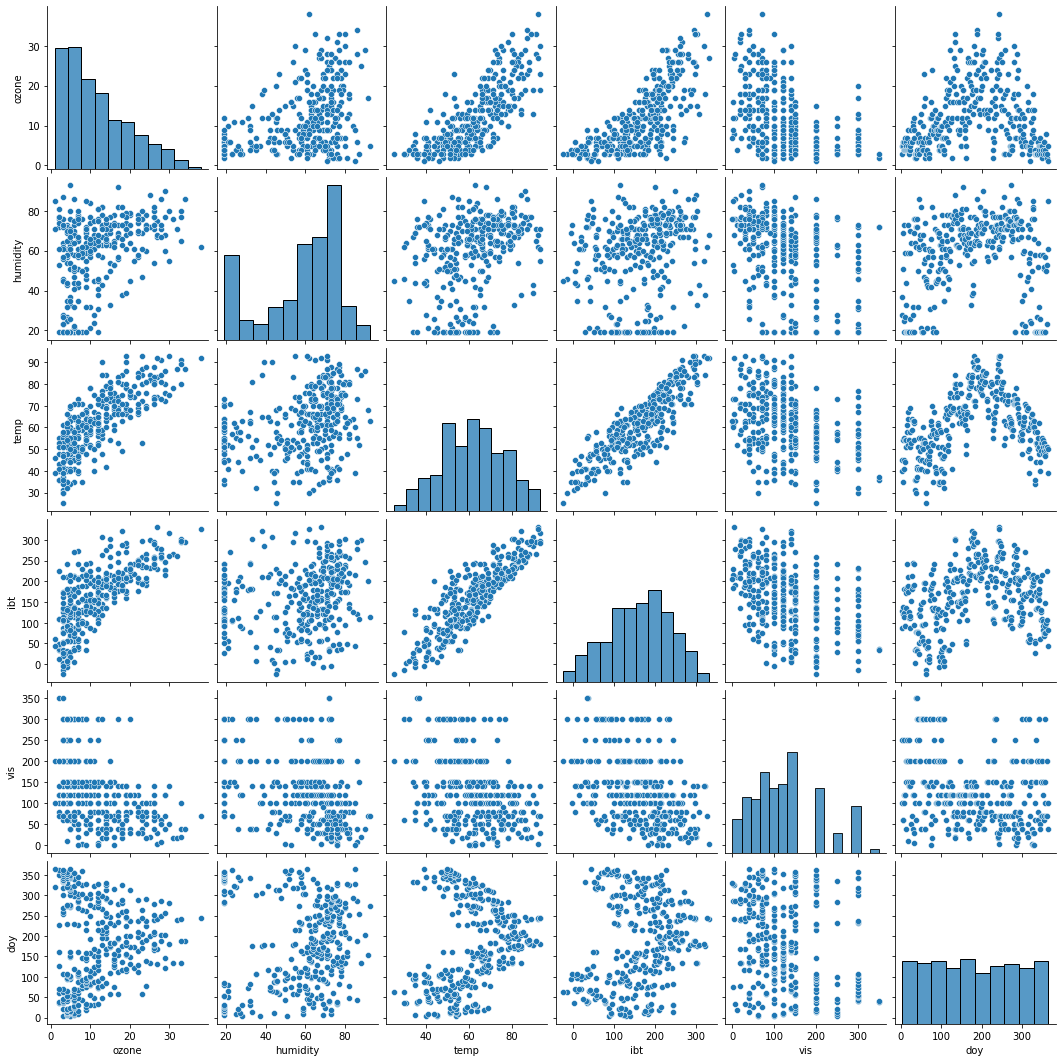

In [30]:
# plot numerical data as pairs
sns.pairplot(LAozone[['ozone','humidity', 'temp', 'ibt', 'vis', 'doy']]);

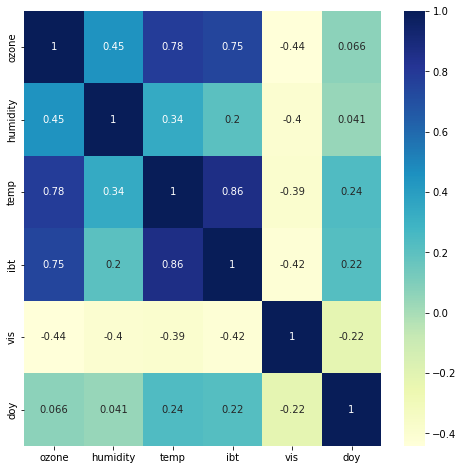

In [31]:
# Correlations
plt.figure(figsize=(8,8))
sns.heatmap(LAozone[['ozone','humidity', 'temp', 'ibt', 'vis', 'doy']].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [33]:
# new Simplified model removing= ibt
X_simp2 = LAozone[['humidity', 'temp', 'vis', 'doy']]
y_simp2 = LAozone['ozone']



In [34]:
# Add a constant to get an intercept
X_simp2_sm = sm.add_constant(X_simp2)


In [35]:
# Fit the resgression line using ‘OLS’
model_simp2 = sm.OLS(y_simp2, X_simp2_sm).fit()

# Alternative way

#from statsmodels.formula.api import ols
#model = ols("sales ~ youtube+facebook+newspaper", data=df).fit()

In [36]:
print(model_simp2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ozone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     167.8
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.01e-77
Time:                        09:15:03   Log-Likelihood:                -969.63
No. Observations:                 330   AIC:                             1949.
Df Residuals:                     325   BIC:                             1968.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.6613      1.634     -7.747      0.0

In [37]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_simp2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_simp2.values, i)
                        for i in range(len(X_simp2.columns))]

print(vif_data)



    feature        VIF
0  humidity   9.625785
1      temp  14.223059
2       vis   2.496666
3       doy   4.073537


In [45]:
# new Simplified model removing= ibt
X_simp3 = LAozone[['temp', 'vis', 'doy']]
y_simp3 = LAozone['ozone']

# Add a constant to get an intercept
X_simp3_sm = sm.add_constant(X_simp3)

# Fit the resgression line using ‘OLS’
model_simp3 = sm.OLS(y_simp, X_simp3_sm).fit()

print(model_simp3.summary())


                            OLS Regression Results                            
Dep. Variable:                  ozone   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     204.6
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           1.28e-74
Time:                        09:22:33   Log-Likelihood:                -979.71
No. Observations:                 330   AIC:                             1967.
Df Residuals:                     326   BIC:                             1983.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3142      1.500     -6.209      0.0

In [46]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_simp3.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_simp3.values, i)
                        for i in range(len(X_simp3.columns))]

print(vif_data)

  feature       VIF
0    temp  5.597619
1     vis  2.495784
2     doy  4.072839


In [51]:
# Interaction of variables
# Two options: inccluding the term in the formula or introducing a new column in the dataframe with the interaction



# Option with formula
import statsmodels.formula.api as smf
model_interac = smf.ols(formula = 'ozone ~ humidity+temp+vis+doy+ temp*humidity', data = LAozone)
model_interac = model_interac.fit()
print(model_interac.summary())

# Option adding a column with interaction (matrixes )
# ==============================================================================
# Adding column of interaction
X_simp2['temp_hum'] = X_simp2['temp'] * X_simp2['humidity']

# Add a constant to get an intercept
#X_simp2_sm = sm.add_constant(X_simp2)

# Fit the resgression line using ‘OLS’
#model_interac2 = sm.OLS(y_simp2, X_simp2_sm).fit()


#print(model_interac2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ozone   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     153.8
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           2.58e-83
Time:                        10:46:03   Log-Likelihood:                -953.78
No. Observations:                 330   AIC:                             1920.
Df Residuals:                     324   BIC:                             1942.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.6376      4.039      2.138

In [52]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_simp2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_simp2.values, i)
                        for i in range(len(X_simp2.columns))]

print(vif_data)



    feature        VIF
0  humidity  31.095243
1      temp  27.957021
2       vis   4.504093
3       doy   4.216351
4  temp_hum  48.560084


In [53]:
# Once the variables to use are known, we proceed to prepare the dataset with a partition for training and another one for test
###############################################################################################################################

from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
X = LAozone[['humidity', 'temp', 'vis', 'doy']]
y = LAozone['ozone']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        #y.values.reshape(-1,1),
                                        y,
                                        train_size   = 0.7,  # 70% for training
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [54]:
# Interaction of variables

# Model creation with interactions
# ===============================================
# Adding new column including the interaction
X_train['hum_temp'] = X_train['humidity'] * X_train['temp']
X_test['hum_temp']  = X_test['humidity'] * X_test['temp']

# A la matriz de predictores se le tiene que añadir una columna de 1s
# para el intercept del modelo

# Add a constant to get an intercept
X_train_c = sm.add_constant(X_train, prepend=True)
model_train  = sm.OLS(endog=y_train, exog=X_train_c,)

# Fit the resgression line using ‘OLS’
model_train  = model_train.fit()
print(model_train.summary())



                            OLS Regression Results                            
Dep. Variable:                  ozone   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     111.6
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           8.33e-59
Time:                        11:26:03   Log-Likelihood:                -667.20
No. Observations:                 230   AIC:                             1346.
Df Residuals:                     224   BIC:                             1367.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0452      5.089      1.777      0.0

In [55]:
# Estimation error
# ==============================================================================
prediction_train = model_train.predict(exog=X_train_c)

#Conversion series object to vector
prediction_train=prediction_train.to_numpy()


#print ("pred real", prediction_train.shape, y_train.shape)

residuals_train   = y_train-prediction_train

#print ("pred real residual", prediction_train.shape, y_train.shape, residuals_train.shape)

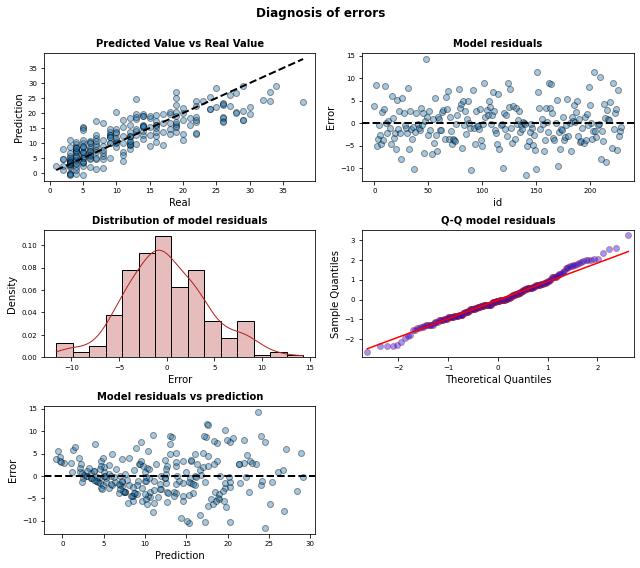

In [57]:
# Graphics
# ============================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))


axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residuals vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Error')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnosis of errors', fontsize = 12, fontweight = "bold");

In [58]:
# Obtaining influencial point
influence = model_train.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum.head())

     dfb_const  dfb_humidity  dfb_temp   dfb_vis   dfb_doy  dfb_hum_temp  \
101   0.002501      0.023392  0.005471 -0.026805 -0.032418     -0.020342   
215   0.006500     -0.024487 -0.023785  0.032498  0.045858      0.040244   
166   0.254273     -0.226527 -0.301253  0.061457  0.032420      0.261625   
5    -0.034545      0.039810  0.012948 -0.042894  0.082282     -0.023821   
278   0.015884     -0.012058 -0.016276 -0.010547 -0.008968      0.014341   

      cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
101  0.001396        0.859541  0.011206         0.091505       0.859038   
215  0.005510        1.933651  0.008764         0.181821       1.945637   
166  0.019875       -1.176515  0.079319        -0.345328      -1.177530   
5    0.003741       -0.806463  0.033358        -0.149813      -0.805831   
278  0.000104       -0.081251  0.086223        -0.024959      -0.081071   

       dffits  
101  0.091451  
215  0.182948  
166 -0.345626  
5   -0.149695  
278 -0.02490

Examples with higher Cook distance [ 48 141  31 221   2 170  90 124  25 209]


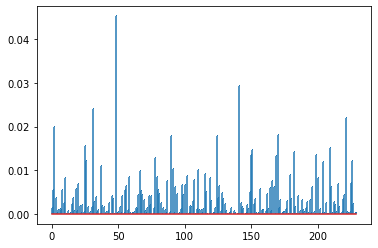

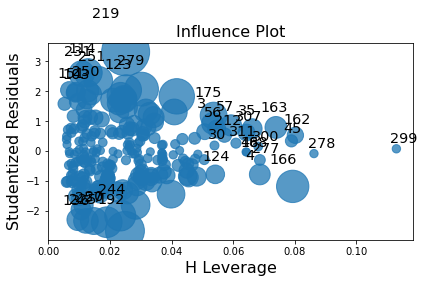

In [59]:
#' ## Cooks distance

influence = model_train.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

#PLotting Cook distance:
plt.stem(np.arange(len(c)), c, markerfmt=",")

# samples with higher coolk distancve
idx = (-c).argsort()[:10] # 10 cases

print("Examples with higher Cook distance", idx)


# Plotting influence graphic

#In statsmodels .influence_plot the influence of each point can be visualized by the criterion keyword argument. 
#Options are Cook’s distance and DFFITS, two measures of influence. 

#Steps to compute Cook’s distance:

#Delete observations one at a time.
#Refit the regression model on remaining (n−1) observations
#Examine how much all of the fitted values change when the ith observation is deleted.
fig = sm.graphics.influence_plot(model_train, criterion="cooks")
fig.tight_layout(pad=1.0)

#To identify values with high influence, we look for observations with:

#big blue points (high Cook’s distance) and
#high leverage (X-axis) which additionally have
#high or low studentized residuals (Y-axis).


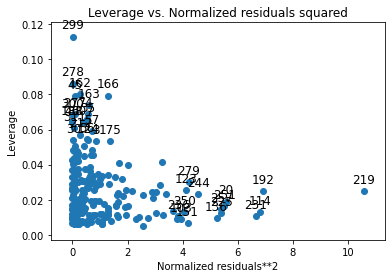

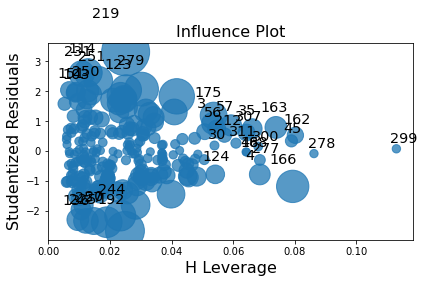

In [60]:
# Leverage plots

leverage = influence.hat_matrix_diag  # for obtaining levarage of each case


from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(model_train)
#influence_plot(model)


fig = sm.graphics.influence_plot(model_train, criterion="cooks")
fig.tight_layout(pad=1.0)

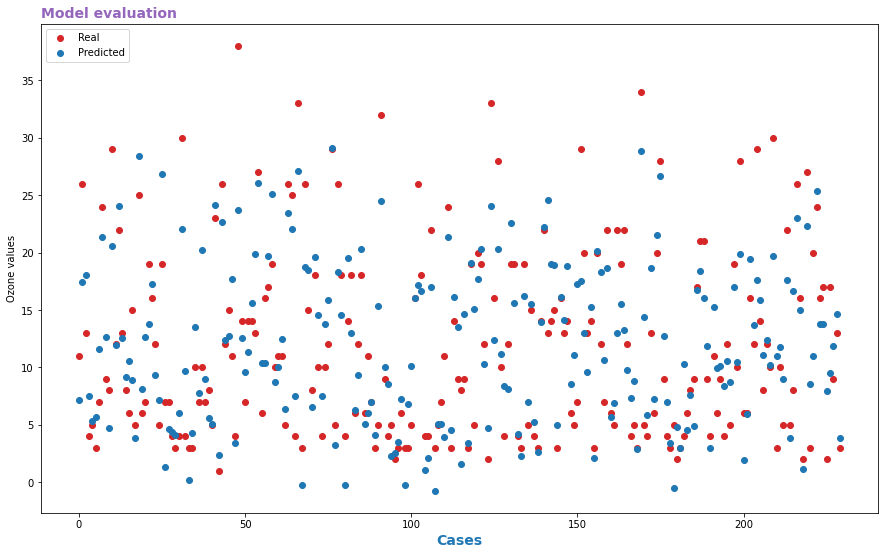

In [61]:
# PREDICTION in TRAIN

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Ozone values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

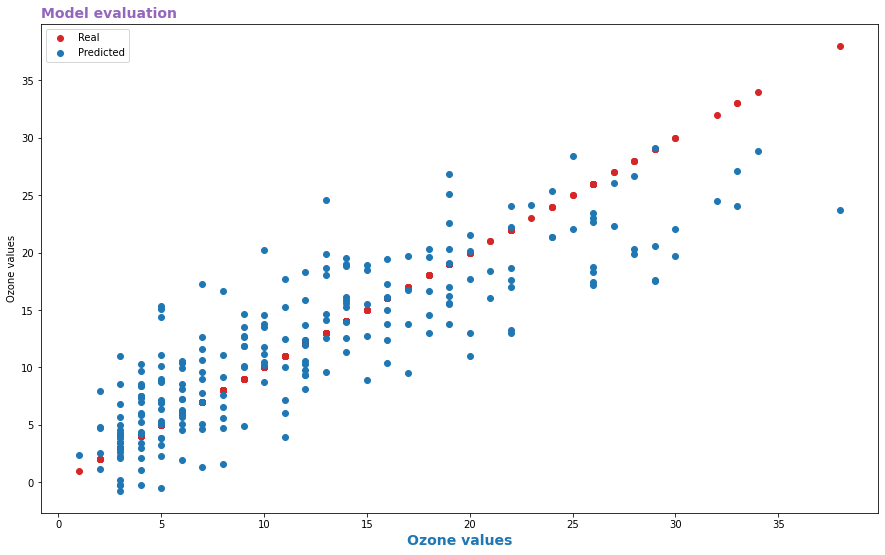

In [64]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Ozone values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Ozone values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

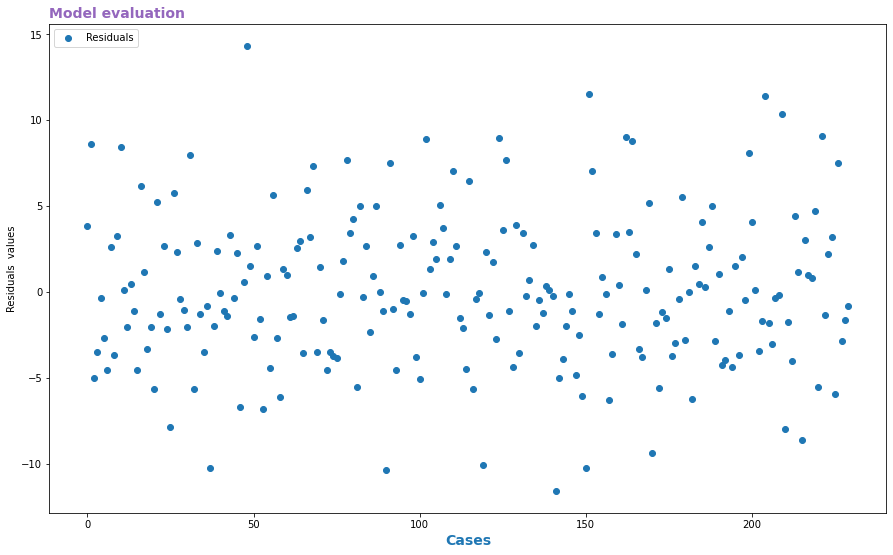

In [66]:
# Residuals
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

#ax.scatter(x_axis, ynews, color = 'tab:red', label='Real')
ax.scatter(x_axis, residuals_train, color = 'tab:blue', label='Residuals')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Residuals  values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='ozone', ylabel='Density'>

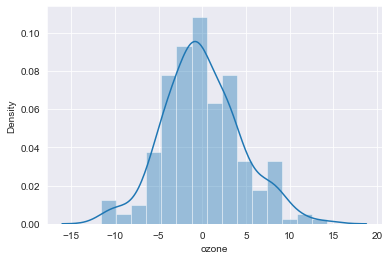

In [76]:
# Error in training
sns.set_style('darkgrid')
sns.distplot(residuals_train)

In [75]:
# Indicators of the model obtained
print('Mean Absolute Error - training:', metrics.mean_absolute_error(y_train, prediction_train))  
print('Mean Squared Error - training:', metrics.mean_squared_error(y_train, prediction_train))  
print('Root Mean Squared Error - training:', np.sqrt(metrics.mean_squared_error(y_train, prediction_train)))

Mean Absolute Error - training: 3.415019480242933
Mean Squared Error - training: 19.372471143703752
Root Mean Squared Error - training: 4.4014169472686575


In [67]:
# Estimation error in TEST (new cases do not included in training datasey)
# ==============================================================================

# Add a constant to get an intercept
X_test_c = sm.add_constant(X_test, prepend=True)

prediction_test = model_train.predict(exog=X_test_c)

#Conversion series object to vector
prediction_test=prediction_test.to_numpy()


#print ("pred real", prediction_train.shape, y_train.shape)

residuals_test   = y_test-prediction_test

print ("pred real residual", prediction_test.shape, y_test.shape, residuals_test.shape)

pred real residual (100,) (100,) (100,)


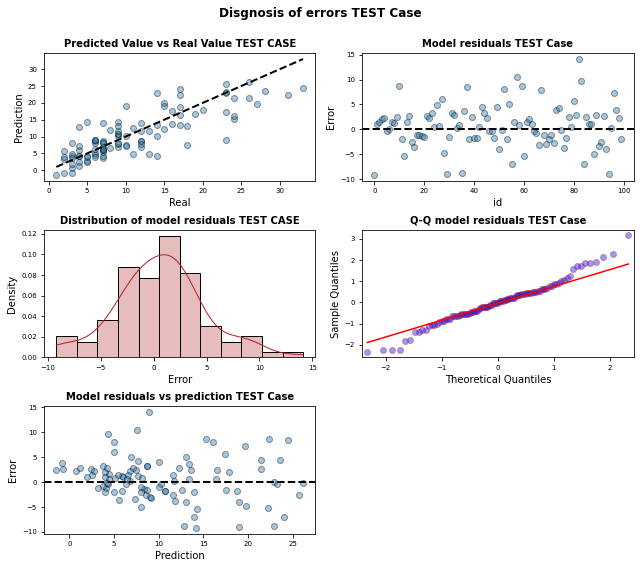

In [68]:
# Graphics
# ============================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))


axes[0, 0].scatter(y_test, prediction_test, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value TEST CASE', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals TEST Case', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals TEST CASE', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_test,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals TEST Case', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_test, residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residuals vs prediction TEST Case', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Error')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Disgnosis of errors TEST Case', fontsize = 12, fontweight = "bold");

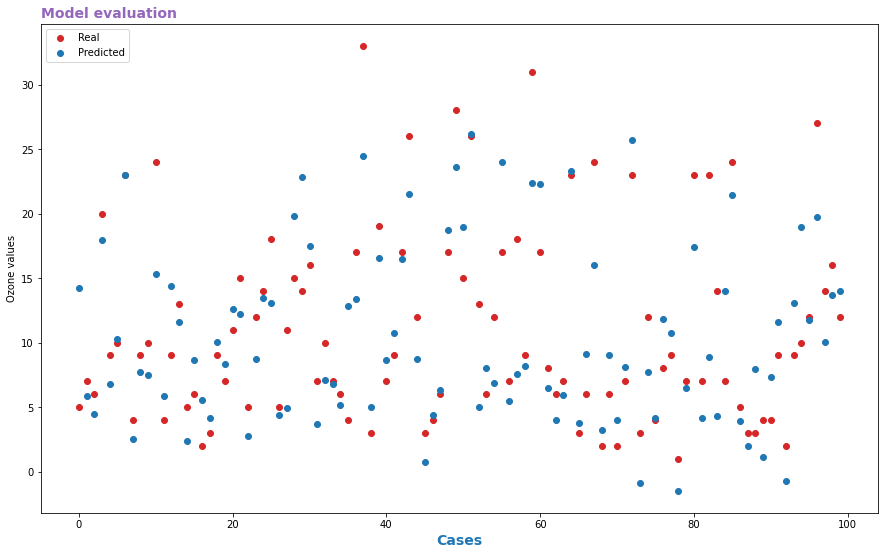

In [70]:
# PREDICTION in TEST

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Ozone values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

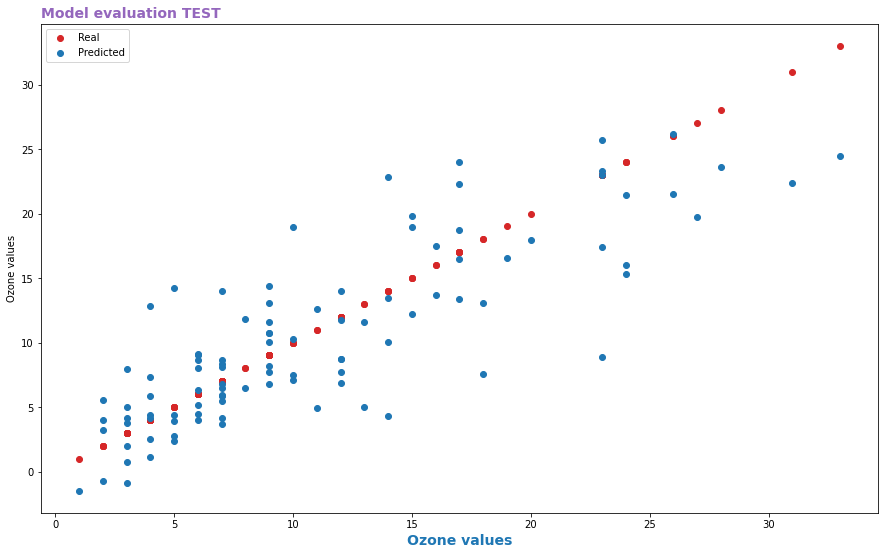

In [72]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Ozone values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Ozone values")
ax.set_title('Model evaluation TEST ', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

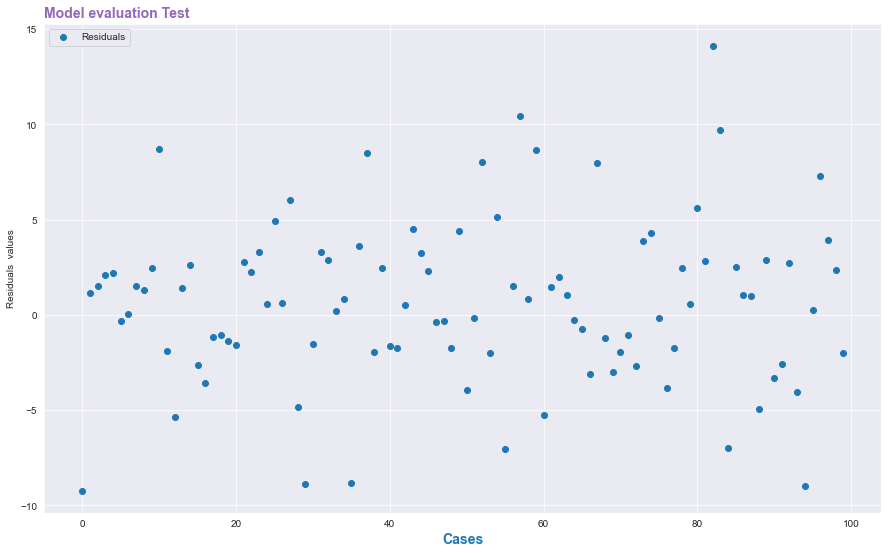

In [78]:
# Residuals
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

#ax.scatter(x_axis, ynews, color = 'tab:red', label='Real')
ax.scatter(x_axis, residuals_test, color = 'tab:blue', label='Residuals')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Residuals  values")
ax.set_title('Model evaluation Test', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='ozone', ylabel='Density'>

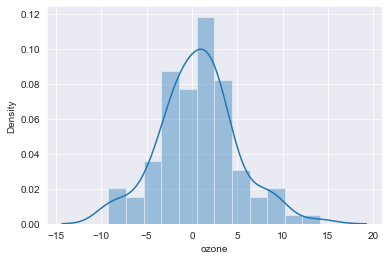

In [77]:
# Error in training
sns.set_style('darkgrid')
sns.distplot(residuals_test)

In [74]:
# Indicators of the model with test
print('Mean Absolute Error - test:', metrics.mean_absolute_error(y_test, prediction_test))  
print('Mean Squared Error - test:', metrics.mean_squared_error(y_test, prediction_test))  
print('Root Mean Squared Error - test:', np.sqrt(metrics.mean_squared_error(y_test, prediction_test)))

Mean Absolute Error - test: 3.2781792626338673
Mean Squared Error - test: 18.579964112878738
Root Mean Squared Error - test: 4.310448249646287
